# Prevalence of Chronic Diseases in the United States

### 1. Loading the Dataset
Dataset has been downloaded from the CDC website and saved as a CSV file on Google Drive. The data is loaded into a pandas DataFrame for further analysis.
<br>
 
*PLACES: Local Data for Better Health, Place Data 2023 release*
<br>
(CDC URL) https://data.cdc.gov/500-Cities-Places/PLACES-Local-Data-for-Better-Health-Place-Data-202/eav7-hnsx/about_data
<br>
(Google Drive URL) https://drive.google.com/file/d/1YPqH7BBPuoZjumdfMnqw-O82HZLoxq1t/view?usp=sharing

In [12]:
# import libraries for data loading
import pandas as pd

# google drive location of the file
url = 'https://drive.google.com/file/d/1YPqH7BBPuoZjumdfMnqw-O82HZLoxq1t/view?usp=sharing'

# extract file id from the url
file_id = url.split('/')[-2]

# create a read path
read_path = 'https://drive.usercontent.google.com/download?id={}&export=download&authuser=0&confirm=t'.format(file_id)

# read the data
df = pd.read_csv(read_path)
df.head()


,Year,StateAbbr,StateDesc,LocationName,DataSource,Category,Measure,Data_Value_Unit,Data_Value_Type,Data_Value,...,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,Geolocation,LocationID,CategoryID,MeasureId,DataValueTypeID,Short_Question_Text
0,2020,AK,Alaska,Kiana,BRFSS,Health Outcomes,All teeth lost among adults aged >=65 years,%,Crude prevalence,38.5,...,NaN,29.0,48.0,347,POINT (-160.4343638 66.97258641),239300,HLTHOUT,TEETHLOST,CrdPrv,All Teeth Lost
1,2021,AK,Alaska,Koliganek,BRFSS,Health Outcomes,Arthritis among adults aged >=18 years,%,Crude prevalence,22.0,...,NaN,18.5,25.7,209,POINT (-157.2259091 59.69715239),241500,HLTHOUT,ARTHRITIS,CrdPrv,Arthritis
2,2021,AK,Alaska,Kongiganak,BRFSS,Health Outcomes,Arthritis among adults aged >=18 years,%,Crude prevalence,23.5,...,NaN,20.2,27.0,439,POINT (-162.8830767 59.95797089),241610,HLTHOUT,ARTHRITIS,CrdPrv,Arthritis
3,2021,AK,Alaska,Lakes,BRFSS,Health Outcomes,Obesity among adults aged >=18 years,%,Crude prevalence,36.7,...,NaN,32.5,41.2,8364,POINT (-149.3066764 61.60526948),242832,HLTHOUT,OBESITY,CrdPrv,Obesity
4,2021,AK,Alaska,Mountain Village,BRFSS,Health Outcomes,Obesity among adults aged >=18 years,%,Crude prevalence,47.3,...,NaN,39.2,56.1,813,POINT (-163.7209368 62.09111567),251180,HLTHOUT,OBESITY,CrdPrv,Obesity


### 2. Exploratory Data Analysis
We will subset the data to include only chronic disease prevalence indicators and analyze the prevalence of chronic diseases in the United States. We will identify patterns and trends in chronic disease prevalence and visualize the data using various plots and charts to communicate the findings.

In [19]:
# We are only interested in Category = 'Health Outcomes' and Data_Value_Type = 'Age-adjusted prevalencee'
df_filtered = df[(df['Category'] == 'Health Outcomes') & (df['Data_Value_Type'] == 'Age-adjusted prevalence')]

# unique values for 'Short_Question_Text' and 'Measure' 
# (show as dataframe for better readability)
# (set the display option to show all columns)
pd.set_option('display.max_colwidth', None)
pd.DataFrame({'Short_Question_Text': df_filtered['Short_Question_Text'].unique(), 'Measure': df_filtered['Measure'].unique()})

,Short_Question_Text,Measure
0,Arthritis,Arthritis among adults aged >=18 years
1,Stroke,Stroke among adults aged >=18 years
2,Obesity,Obesity among adults aged >=18 years
3,Depression,Depression among adults aged >=18 years
4,Current Asthma,Current asthma among adults aged >=18 years
5,Coronary Heart Disease,Coronary heart disease among adults aged >=18 years
6,Diabetes,Diagnosed diabetes among adults aged >=18 years
7,High Blood Pressure,High blood pressure among adults aged >=18 years
8,High Cholesterol,High cholesterol among adults aged >=18 years who have been screened in the past 5 years
9,Cancer (except skin),Cancer (excluding skin cancer) among adults aged >=18 years


In [24]:
# We will use data for all except 'All Teeth Lost'
df_filtered = df_filtered[df_filtered['Short_Question_Text'] != 'All Teeth Lost']

In [26]:
# how many 'Year's are reported in the data
df_filtered.groupby(['Year', 'Short_Question_Text']).size()

Year  Short_Question_Text   
2021  Arthritis                 27573
      COPD                      27573
      Cancer (except skin)      27573
      Chronic Kidney Disease    27573
      Coronary Heart Disease    27573
      Current Asthma            27573
      Depression                27573
      Diabetes                  27573
      High Blood Pressure       27573
      High Cholesterol          27573
      Obesity                   27573
      Stroke                    27573
dtype: int64

In [27]:
# How many 'StateAbbr' are reported in the data
# group by 'Year' and 'Short_Question_Text' and count the unique 'StateAbbr'
df_filtered.groupby(['Year', 'Short_Question_Text'])['StateAbbr'].nunique()

Year  Short_Question_Text   
2021  Arthritis                 50
      COPD                      50
      Cancer (except skin)      50
      Chronic Kidney Disease    50
      Coronary Heart Disease    50
      Current Asthma            50
      Depression                50
      Diabetes                  50
      High Blood Pressure       50
      High Cholesterol          50
      Obesity                   50
      Stroke                    50
Name: StateAbbr, dtype: int64

In [28]:
# For each 'Short_Question_Text', calculate the average 'Data_Value' for each 'StateAbbr'
# 'Short_Question_Text' are rows and 'StateAbbr' are columns
df_pivot = df_filtered.pivot_table(index='Short_Question_Text', columns='StateAbbr', values='Data_Value', aggfunc='mean')
df_pivot

StateAbbr,AK,AL,AR,AZ,CA,CO,CT,DC,DE,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Short_Question_Text,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Arthritis,24.087773,29.125573,27.448936,24.142931,20.794596,22.928040,21.915493,20.2,23.614474,25.870569,19.009524,23.085193,23.227885,22.738681,25.881487,24.432483,27.756274,27.154390,23.035124,24.172074,25.528125,26.088905,21.589952,26.469589,28.013687,23.647557,25.572563,23.789015,22.541856,24.616495,21.305587,22.408115,24.254783,23.824554,26.777908,26.123030,23.817270,25.369664,24.436111,26.595116,22.438235,27.801874,22.878380,23.123453,25.773630,25.208475,24.827334,24.749137,31.368193,22.019872
COPD,8.639301,8.400882,8.605996,8.311825,5.923088,5.662035,5.100000,4.8,6.302632,7.592033,4.660544,6.247182,6.610577,6.534333,7.855083,6.507143,9.373764,8.723983,5.447521,5.487269,7.434375,7.239562,5.357143,8.356602,8.540782,6.487296,7.402925,5.671212,5.642268,6.246392,5.044693,6.638743,7.228696,6.336279,7.921423,8.335455,6.748189,6.812297,5.425000,7.628792,6.321569,9.032787,7.223551,5.601303,6.975171,6.066949,5.940747,5.565339,10.634606,6.468590
Cancer (except skin),6.167686,6.260847,6.263056,6.148329,5.897965,6.202233,6.369014,5.8,6.321053,6.001626,5.433333,6.450387,6.375481,6.396402,6.470410,6.444558,6.454183,6.145824,6.558678,6.230595,6.492188,6.514453,6.418039,6.448810,6.082123,6.389902,6.195543,6.521212,6.304330,6.502062,6.224581,5.558377,6.266087,6.362532,6.505021,6.406364,6.453203,6.409861,6.375000,6.063239,6.430392,6.400703,5.871838,6.433225,6.217808,6.422881,6.405433,6.483533,6.348092,6.384615
Chronic Kidney Disease,3.557205,3.171252,3.143133,3.680463,2.920421,2.686104,2.489437,2.9,2.818421,3.340163,2.748980,2.596464,2.879808,2.695052,2.783005,2.669728,2.956464,3.300000,2.473554,2.707187,2.706250,2.822044,2.617191,2.835065,3.463687,2.820195,3.085097,2.672348,2.571959,2.512371,2.508566,3.469110,2.872174,2.597026,2.781506,3.094848,2.817827,2.668155,2.547222,3.223393,2.896405,2.977283,3.169595,2.734853,2.851027,2.550847,2.795925,2.647410,3.082443,2.648718
Coronary Heart Disease,7.196507,6.474427,6.793230,6.734704,5.257544,4.809677,4.599296,4.2,5.347368,6.076585,4.602721,5.006077,5.627404,5.300450,5.658877,5.637925,6.401901,6.490150,4.630992,4.825462,5.648438,5.650657,5.084867,6.119913,6.756145,5.519544,5.971170,5.388636,5.029072,4.822680,4.676164,5.998953,5.669565,5.072727,6.027615,6.628030,5.614206,5.548956,4.919444,5.970180,5.800654,6.380328,5.927726,5.028339,5.276712,4.988983,5.015110,5.094422,7.396947,5.289103
Current Asthma,11.112227,10.874956,10.316054,11.865810,9.940632,10.500248,10.919718,11.0,10.457895,10.732358,9.465306,9.486630,10.616346,9.982309,10.703642,10.231122,11.485551,10.827623,11.112810,10.088501,11.960156,11.201022,9.638378,10.145346,11.101676,10.683713,10.301950,9.117045,8.711546,11.364948,9.375791,11.239529,10.233913,10.948853,10.448285,11.809091,11.310028,10.790255,11.763889,10.226992,9.427124,10.905621,9.855327,10.344300,10.754110,11.185593,11.226486,10.485392,12.168957,9.813462
Depression,21.222271,24.150617,26.681044,21.547558,19.383649,22.342928,22.276761,20.1,19.111842,21.642764,15.044898,19.125635,23.335096,21.351574,26.414568,21.389796,28.316160,26.794861,22.857025,20.059548,25.985937,25.374307,23.471186,25.238961,22.305307,23.809446,23.976045,19.577652,17.469485,24.951546,20.400931,21.177225,21.576522,22.810875,24.213389,25.884848,27.299443,23.387645,25.841667,21.977378,17.722222,28.920609,23.337259,24.182085,22.566096,27.627119,27.185739,23.199203,29.391349,20.932051
Diabetes,11.939738,12.440035,11.485687,11.992802,10.188281,7.584119,7.960563,9.2,9.686842,12.645366,8.779592,8.208398,9.460577,9.076537,10.035660,9.521429,10.784221,12.829979,7.261983,9.541478,8.325781,8.987153,8.233293,10.392100,14.168715,8.744951,11.121866,8.686364,8.414227,7.451546,8.105773,12.532461,9.434783,8.831521,10.245607,11.706364,8.901950,8.618677,7.852778,12.764010,9.571242,11.393208,12.12573

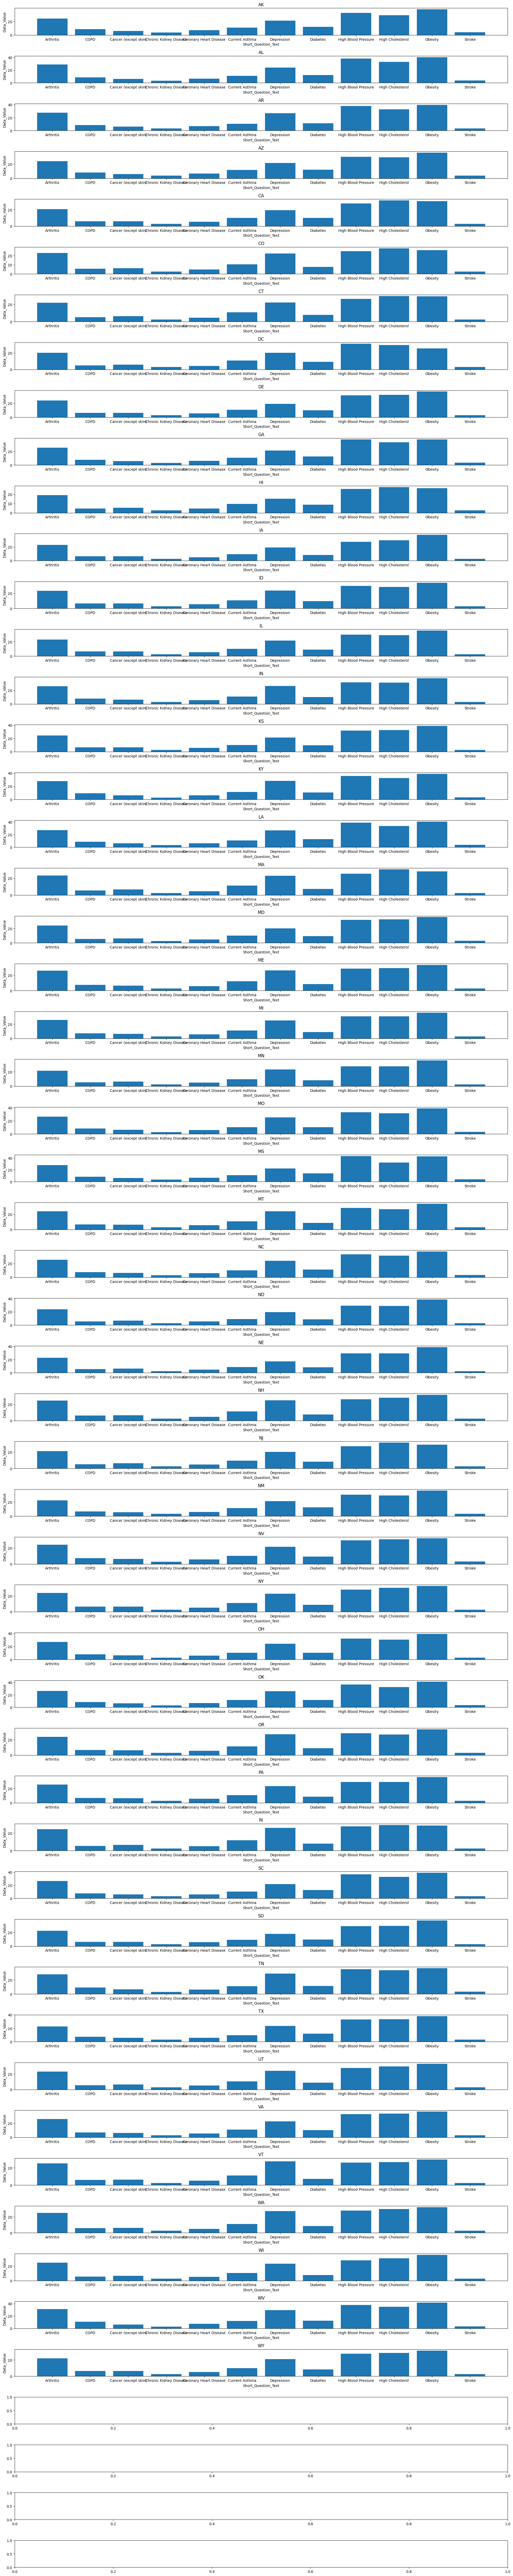

In [39]:
# plot the data

# we have 12 'Short_Question_Text' and 54 'StateAbbr'
# subplot for each 'StateAbbr' and use 'Short_Question_Text' as the x-axis
# set the figure size
import matplotlib.pyplot as plt

# fig, ax = plt.subplots(54, 1, figsize=(10, 100))
fig, ax = plt.subplots(54, 1, figsize=(20, 100))

# iterate over each 'StateAbbr'
for i, state in enumerate(df_pivot.columns):
    ax[i].bar(df_pivot.index, df_pivot[state])
    # ax[i].axhline(df_pivot[state].min(), color='r', linestyle='--')
    # ax[i].axhline(df_pivot[state].median(), color='g', linestyle='--')
    # ax[i].axhline(df_pivot[state].max(), color='b', linestyle='--')
    ax[i].set_title(state)
    ax[i].set_ylabel('Data_Value')
    ax[i].set_xlabel('Short_Question_Text')

plt.tight_layout()
plt.show()